**STEPS TO VERIFY THE CODE FILE**


1.   UPLOAD 'output_cl.csv'
2.   UPLOAD 'test.txt'
3. RUN ALL THE CELLS AND YOU WILL GET A 'result.txt' with the output in asked formate.
4.  SOME OUTPUTS OF RESULTS ARE ATTACHED IN PPT




In [ ]:
# @title LIBRARIES
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam, Adagrad, RMSprop
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# from sklearn.metrics import accuracy_score, classification_report
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from sklearn.metrics import accuracy_score, classification_report
# Download VADER lexicon if not already downloaded
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from tensorflow.keras.optimizers import Adam, Adagrad

In [ ]:
nltk.download('vader_lexicon')
!pip install imbalanced-learn scikit-learn

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# @title VADER ANALYZER
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Text to analyze
text = "I don't have anyone to talk to and I don't know what to do anymore"

# Analyze sentiment
scores = sid.polarity_scores(text)

# Print sentiment scores
print("Sentiment Scores:", scores)

# Get positive score
positive_score = scores['pos']

print("Positive Score:", positive_score)

Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Positive Score: 0.0


In [ ]:
scores['compound']

0.0

In [ ]:
!pip install wikipedia2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 20.9 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('output_cl.csv')

In [ ]:
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)
    # Remove stopwords
    text_tokens = text.split()
    filtered_text = [word for word in text_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Load data
df = pd.read_csv('output_cl.csv')

# Apply preprocessing to post title and text
df['post_title'] = df['post_title'].apply(preprocess_text)
df['post_text'] = df['post_text'].apply(preprocess_text)

# Function to calculate sentiment scores
def calculate_sentence(text):
    scores = sid.polarity_scores(text)
    return scores['compound'], scores['neg'], scores['neu']

# Calculate sentiment scores for 'post_text' column
df[['text_compound_score', 'text_negative_score', 'text_neutral_score']] = df['post_text'].apply(calculate_sentence).apply(pd.Series)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


FileNotFoundError: [Errno 2] No such file or directory: 'output_cl.csv'

In [ ]:
['post_title', 'post_text',
       'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
       'Feeling-down-depressed-or-hopeless',
       'Feeling-tired-or-having-little-energy',
       'Little-interest-or-pleasure-in-doing',
       'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
       'Poor-appetite-or-overeating',
       'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
       'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
       'Trouble-falling-or-staying-asleep-or-sleeping-too-much',
       'title_compound_score', 'title_negative_score', 'title_neutral_score',
       'text_compound_score', 'text_negative_score', 'text_neutral_score']

['post_title',
 'post_text',
 'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
 'Feeling-down-depressed-or-hopeless',
 'Feeling-tired-or-having-little-energy',
 'Little-interest-or-pleasure-in-doing',
 'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
 'Poor-appetite-or-overeating',
 'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
 'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
 'Trouble-falling-or-staying-asleep-or-sleeping-too-much',
 'title_compound_score',
 'title_negative_score',
 'title_neutral_score',
 'text_compound_score',
 'text_negative_score',
 'text_neutral_score']

#1)'Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down'

In [ ]:

# Drop unnecessary columns
X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down']

# Apply SMOTE for balancing classes
smote = SMOTE(sampling_strategy='auto', random_state=500)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=500)

# Initialize RandomForestClassifier
rfc0 = RandomForestClassifier()

# Fit the model
rfc0.fit(X_train, y_train)

# Make predictions
rfc_predict = rfc0.predict(X_test)

# Check performance
print('ROCAUC score:', roc_auc_score(y_test, rfc_predict))
print('Accuracy score:', accuracy_score(y_test, rfc_predict))
print('F1 score:', f1_score(y_test, rfc_predict))

ROCAUC score: 0.7513290802764487
Accuracy score: 0.7514880952380952
F1 score: 0.745814307458143


#2)'Feeling-down-depressed-or-hopeless'

In [ ]:

# Drop unnecessary columns
X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Feeling-down-depressed-or-hopeless']

# Apply SMOTE for balancing classes
smote = SMOTE(sampling_strategy='auto', random_state=500)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=500)

# Initialize RandomForestClassifier
rfc1 = RandomForestClassifier()

# Fit the model
rfc1.fit(X_train, y_train)

# Make predictions
rfc_predict = rfc1.predict(X_test)

# Check performance
print('ROCAUC score:', roc_auc_score(y_test, rfc_predict))
print('Accuracy score:', accuracy_score(y_test, rfc_predict))
print('F1 score:', f1_score(y_test, rfc_predict))

NameError: name 'df' is not defined

# 3)'Feeling-tired-or-having-little-energy'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Feeling-tired-or-having-little-energy']

smote = SMOTE(sampling_strategy='auto', random_state=500)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=500)


rfc2 = RandomForestClassifier()

# fit the predictor and target
rfc2.fit(X_train, y_train)

# predict
rfc_predict = rfc2.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

#4)'Little-interest-or-pleasure-in-doing'

---



In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Little-interest-or-pleasure-in-doing']

smote = SMOTE(sampling_strategy='auto', random_state=49)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=49)


rfc3 = RandomForestClassifier()

# fit the predictor and target
rfc3.fit(X_train, y_train)

# predict
rfc_predict = rfc3.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.5214292138873898
Accuracy score: 0.5213270142180095
F1 score: 0.5280373831775701


#5)'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual']

smote = SMOTE(sampling_strategy='auto', random_state=49)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=49)


rfc4 = RandomForestClassifier()

# fit the predictor and target
rfc4.fit(X_train, y_train)

# predict
rfc_predict = rfc4.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.7142224675429216
Accuracy score: 0.7135593220338983
F1 score: 0.7150084317032042


#6)'Poor-appetite-or-overeating'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Poor-appetite-or-overeating']

smote = SMOTE(sampling_strategy='auto', random_state=49)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=49)


rfc5 = RandomForestClassifier()

# fit the predictor and target
rfc5.fit(X_train, y_train)

# predict
rfc_predict = rfc5.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.7922863056911313
Accuracy score: 0.7941988950276243
F1 score: 0.8106734434561627


 # 7)'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way']

smote = SMOTE(sampling_strategy='auto', random_state=49)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=49)


rfc6 = RandomForestClassifier()

# fit the predictor and target
rfc6.fit(X_train, y_train)

# predict
rfc_predict = rfc6.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.6546429020495411
Accuracy score: 0.6534653465346535
F1 score: 0.6520874751491054


#'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television']

smote = SMOTE(sampling_strategy='auto', random_state=500)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=500)


rfc7 = RandomForestClassifier()

# fit the predictor and target
rfc7.fit(X_train, y_train)

# predict
rfc_predict = rfc7.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.8080574712643678
Accuracy score: 0.8063623789764869
F1 score: 0.8092643051771116


#'Trouble-falling-or-staying-asleep-or-sleeping-too-much'

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,f1_score


X = df.drop(['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down',
             'Feeling-down-depressed-or-hopeless',
             'Feeling-tired-or-having-little-energy',
             'Little-interest-or-pleasure-in-doing',
             'Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual',
             'Poor-appetite-or-overeating',
             'Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way',
             'Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television',
             'Trouble-falling-or-staying-asleep-or-sleeping-too-much','post_title','post_text'], axis=1)
y = df['Trouble-falling-or-staying-asleep-or-sleeping-too-much']

smote = SMOTE(sampling_strategy='auto', random_state=49)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=500)


rfc8 = RandomForestClassifier()

# fit the predictor and target
rfc8.fit(X_train, y_train)
# predict
rfc_predict = rfc8.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.7644833427442124
Accuracy score: 0.7638036809815951
F1 score: 0.7741935483870969


In [ ]:
def calculate_sentence(text):
    scores = sid.polarity_scores(text)
    return scores['compound'], scores['neg'], scores['neu']

In [ ]:
# @title READING "test.txt"
# Open the file in read mode
with open('test.txt', 'r') as file:
    # Read the content of the file
    content = file.read()
    # Find the index of the first opening curly brace
    start_index = content.find('{')
    # Find the index of the last closing curly brace
    end_index = content.find('}')
    # Extract the paragraph wrapped between curly braces
    sentence = content[start_index + 1:end_index]


FileNotFoundError: [Errno 2] No such file or directory: 'test.txt'

In [ ]:
# Initialize an empty array to store prediction results
prediction_results = []

# Make predictions for each model and append the result to the array
for rfc in [rfc0, rfc1, rfc2, rfc3, rfc4, rfc5, rfc6, rfc7, rfc8]:
    prediction_results.append(rfc.predict([calculate_sentence(sentence)]))

# Print the array of prediction results
print(prediction_results)

[array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1])]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

In [ ]:
# @title SAVING "result.txt" { vertical-output: true }
# Define the labels 'yes' and 'no'
label_map = {1: 'yes', 0: 'no'}

# Initialize an empty list to store formatted predictions
formatted_predictions = []

# Iterate over the predictions and format them accordingly
for prediction_result in prediction_results:
    formatted_prediction = label_map[prediction_result[0]]
    formatted_predictions.append(formatted_prediction)

# Define the sentiment labels
sentiment_labels = [
    "Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down",
    "Feeling-down-depressed-or-hopeless",
    "Feeling-tired-or-having-little-energy",
    "Little-interest-or-pleasure-in-doing",
    "Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual",
    "Poor-appetite-or-overeating",
    "Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way",
    "Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television",
    "Trouble-falling-or-staying-asleep-or-sleeping-too-much"
]

# Combine sentiment labels and formatted predictions
predictions = list(zip(sentiment_labels, formatted_predictions))

# Write predictions to a text file
with open('result.txt', 'w') as file:
    file.write("{\n")
    for sentiment, prediction in predictions:
        file.write(f'["{sentiment}", "{prediction}"],\n')
    file.write("}\n")


NameError: name 'prediction_results' is not defined

Rough


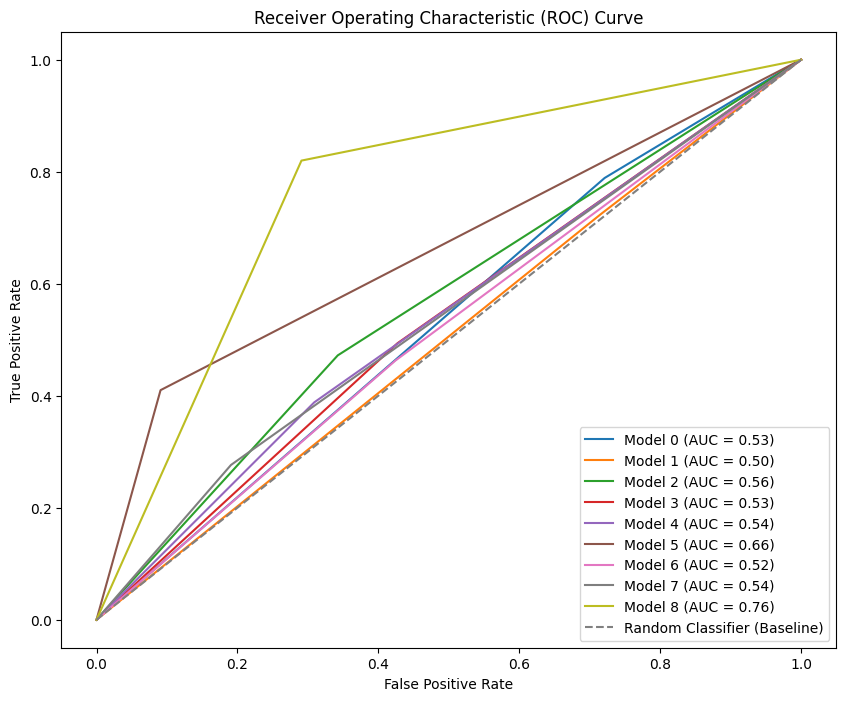

In [ ]:
# @title ROC CURVE { vertical-output: true }
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib
import os

# Assuming you have a list or dictionary containing your models
models = [rfc0, rfc1, rfc2, rfc3, rfc4, rfc5, rfc6, rfc7, rfc8]  # Update with your actual models

# Assuming X_test and y_test are your test features and target labels respectively
# Initialize a figure
plt.figure(figsize=(10, 8))

# Create a directory to save the models
model_save_dir = 'saved_models'
os.makedirs(model_save_dir, exist_ok=True)

# Iterate through each model
for i, model in enumerate(models):
    # Save the model using joblib
    model_save_path = os.path.join(model_save_dir, f'model{i}.pkl')
    joblib.dump(model, model_save_path)

    # Make predictions on the test set
    y_pred_proba = model.predict(X_test)  # Assuming your models have a predict method

    # Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate area under ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Model {i} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (Baseline)')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show plot
plt.show()


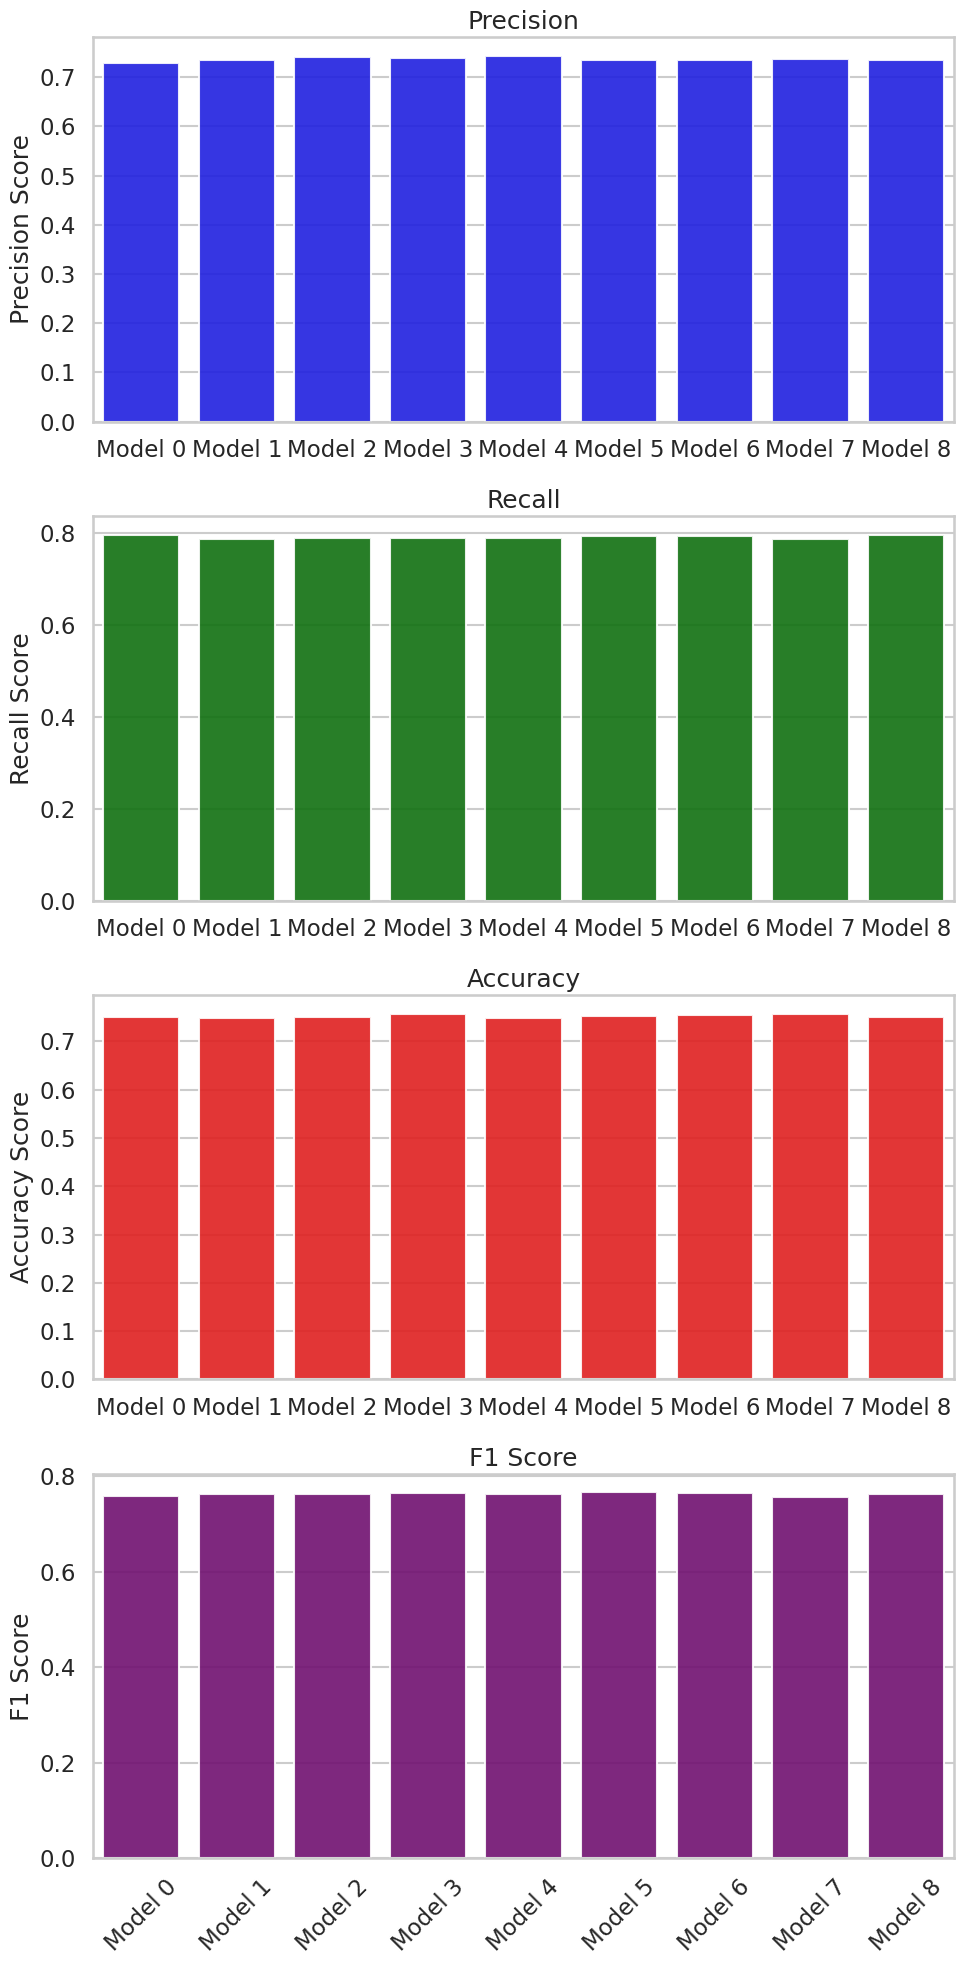

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context of seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

# Define colors for each plot
precision_color = "blue"
recall_color = "green"
accuracy_color = "red"
f1_color = "purple"

# Plotting bar graphs for precision, recall, accuracy, and F1 score
fig, axs = plt.subplots(4, figsize=(10, 20))

# Plot precision
sns.barplot(x=range(len(models)), y=precision_scores, ax=axs[0], alpha=0.90, color=precision_color)
axs[0].set_title('Precision')
axs[0].set_ylabel('Precision Score')
axs[0].set_xticks(range(len(models)))
axs[0].set_xticklabels(['Model {}'.format(i) for i in range(len(models))])

# Plot recall
sns.barplot(x=range(len(models)), y=recall_scores, ax=axs[1], alpha=0.90, color=recall_color)
axs[1].set_title('Recall')
axs[1].set_ylabel('Recall Score')
axs[1].set_xticks(range(len(models)))
axs[1].set_xticklabels(['Model {}'.format(i) for i in range(len(models))])

# Plot accuracy
sns.barplot(x=range(len(models)), y=accuracy_scores, ax=axs[2], alpha=0.90, color=accuracy_color)
axs[2].set_title('Accuracy')
axs[2].set_ylabel('Accuracy Score')
axs[2].set_xticks(range(len(models)))
axs[2].set_xticklabels(['Model {}'.format(i) for i in range(len(models))])

# Plot F1 score
sns.barplot(x=range(len(models)), y=f1_scores, ax=axs[3], alpha=0.90, color=f1_color)
axs[3].set_title('F1 Score')
axs[3].set_ylabel('F1 Score')
axs[3].set_xticks(range(len(models)))
axs[3].set_xticklabels(['Model {}'.format(i) for i in range(len(models))])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming you have your data and labels ready for evaluation
# X_train, y_train = ...
# X_test, y_test = ...

# Assuming models is a list of RandomForestClassifier instances
models = [rfc0, rfc1, rfc2, rfc3, rfc4, rfc5, rfc6, rfc7, rfc8]

# Initialize lists to store predictions of all models
all_predictions = []

# Get predictions from each model
for model in models:
    predictions = model.predict(X_test)
    all_predictions.append(predictions)

# Stack predictions vertically
stacked_predictions = np.vstack(all_predictions)

# Aggregate predictions by averaging
final_predictions = np.mean(stacked_predictions, axis=0)

# You might round the final predictions if it's a classification task
# final_predictions = np.round(final_predictions)

# Evaluate the performance of the ensemble model
# For example, calculate accuracy_score, precision_score, recall_score, etc.


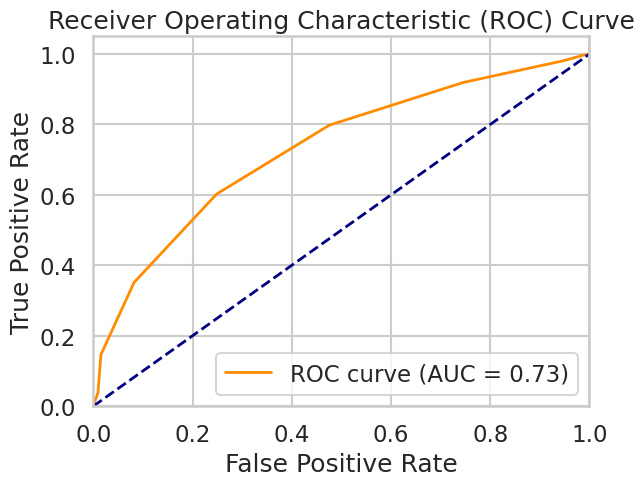

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is your true labels
# y_test = ...

# Compute the ROC curve for the ensemble predictions
fpr, tpr, _ = roc_curve(y_test, final_predictions)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
